In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<Axes: title={'center': 'Inference time for TFLite model in WASM'}, xlabel='timestamp[ns]'>

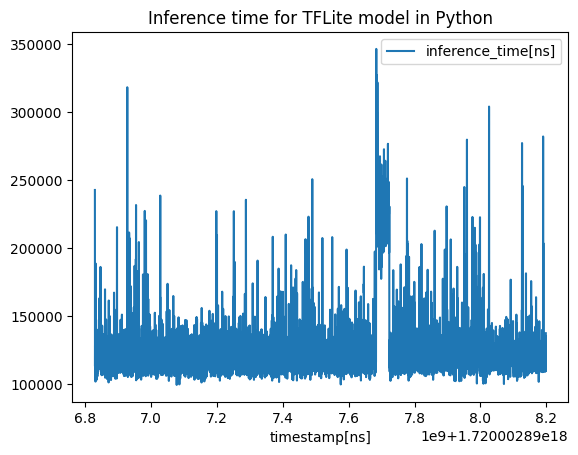

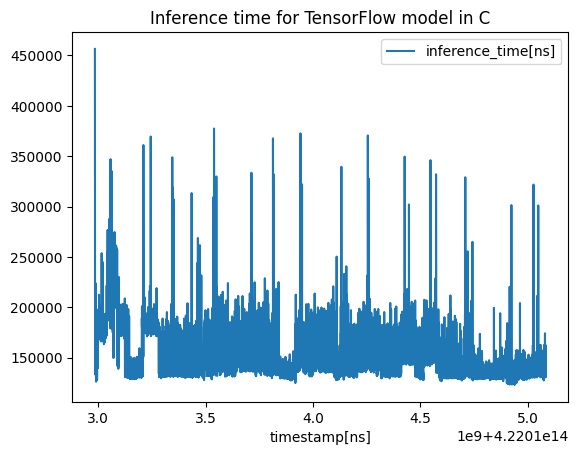

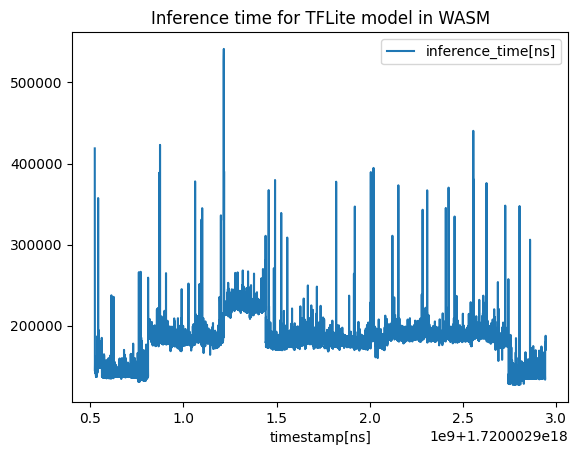

In [35]:
model_type = "dense" #small medium large

#inference time plot mnist
df_inference_tflite_python = pd.read_csv(f"mnist_test/tflite_python_inftime_mnist_{model_type}.csv")
df_inference_tflite_c = pd.read_csv(f"mnist_test/tflite_c_inftime_mnist_{model_type}.csv")
df_inference_tflite_wasm = pd.read_csv(f"mnist_test/tflite_wasm_inftime_mnist_{model_type}.csv")

df_inference_tflite_python.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in Python')
df_inference_tflite_c.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TensorFlow model in C')
df_inference_tflite_wasm.plot(x='timestamp[ns]', y='inference_time[ns]', kind='line', title='Inference time for TFLite model in WASM')

In [36]:
#discad first values and convert to us
df_inference_tflite_python = df_inference_tflite_python[10:]/1e3
df_inference_tflite_c = df_inference_tflite_c[10:]/1e3
df_inference_tflite_wasm = df_inference_tflite_wasm[10:]/1e3

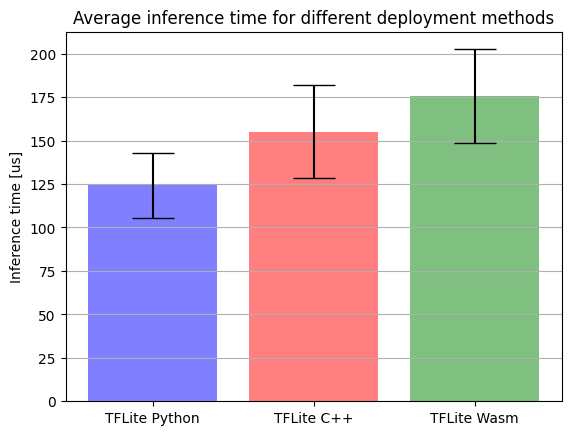

In [37]:
#jump the first 10 values
#average inference time
average_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].mean()
average_inference_tflite_c = df_inference_tflite_c['inference_time[ns]'].mean()
average_inference_tflite_wasm = df_inference_tflite_wasm['inference_time[ns]'].mean()

#standard deviation
std_inference_tflite_python = df_inference_tflite_python['inference_time[ns]'].std()
std_inference_tflite_c = df_inference_tflite_c['inference_time[ns]'].std()
std_inference_tflite_wasm = df_inference_tflite_wasm['inference_time[ns]'].std()

#plot bar chart
fig, ax = plt.subplots()
inference_times = [average_inference_tflite_python,  average_inference_tflite_c, average_inference_tflite_wasm]
std_inference_times = [std_inference_tflite_python,  std_inference_tflite_c, std_inference_tflite_wasm]
labels = ['TFLite Python', 'TFLite C++', 'TFLite Wasm']
x = np.arange(len(labels))
ax.bar(x, inference_times, yerr=std_inference_times, align='center', alpha=0.5, ecolor='black', capsize=15, color= ['blue', 'red', 'green'])
ax.set_ylabel('Inference time [us]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Average inference time for different deployment methods')
ax.yaxis.grid(True)
plt.show()

